<a href="https://colab.research.google.com/github/juacardonahe/Curso_NLP/blob/main/0_ElementosPrevios/RegEx_Avanzado%2BToken.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/juacardonahe/Curso_NLP/refs/heads/main/data/UNAL_Field_w.png" width="40%">

# **Procesamiento de Lenguaje Natural (NLP)**
### Departamento de Ingeniería Eléctrica, Electrónica y Computación
#### Universidad Nacional de Colombia - Sede Manizales

#### Elaboró: Juan José Cardona H.
#### Revisó: Diego A. Perez

# Expresiones Regulares
### Identificación de patrones
#####  "." : Matchea cualquier caracter excepto '\n'
#####  "^" y  "$": Matchean el comienzo y el final de un string
##### "[]": Matchea el set de caracteres que se encuentren dentro de los corchetes (r"l[ao]s" machea "las" y "los")
##### \d: Matchea digitos; equivalente a [0-9].
##### \D: Matchea caracteres que NO sean digitos; equivalente a [^0-9].
##### \s: Matchea espacios en blanco; equivalente a [ \t\n\r\f\v].
##### \S: Matchea espacios que NO esten en blanco; equivalente a [^ \t\n\r\f\v].
##### \w: Matchea caracteres alfanuméricos; equivalente a [a-zA-Z0-9_].
##### \W: Matchea caracteres que NO sean alfanuméricos; equivalente a[^a-zA-Z0-9_].
##### a|b: Matchea "a" o "b"
##### Repeticiones:
##### "+": Matchea 1 o mas ocurrencias
##### "*": Matchea 0 o mas ocurrencias
##### "?": Matchea 0 o 1 ocurrencia
##### "{n, m}": Matchea entre n y m ocurrencias
##### "\\": Permite matchear caracteres especiales
##### para más info ver: https://docs.python.org/3.1/library/re.html#re-syntax

In [ ]:
import re # Librería para trabajar con expresiones regulares
import pandas as pd # Librería para trabajar con DataFrames

In [ ]:
texto = """(Jefe de los Minisupers) 14'49'' Podéis hacerme tres preguntas.
(Apu) 14'58'' Qué bueno, porque sólo necesito una.
(Homer) 15'05'' ¿Usted es el Jefe de los Minisupers?
(Jefe de los Minisupers) 15'13'' Así es.
(Homer) 15'22'' ¿Usted?
(Jefe de los Minisupers) 15'38'' Así es.
(Homer) 15'41'' ¿Está seguro?
(Jefe de los Minisupers) 16' Sí. Espero que los haya iluminado.
(Apu) 16'11'' Pero tengo que...
(Jefe de los Minisupers) 16'2'' Gracias. Vuelva pronto.
(Apu) 16'29'' Pero.
(Jefe de los Minisupers) 16'33'' Graciaaaaas. Vuelva pronto."""

In [ ]:
print(texto)

(Jefe de los Minisupers) 14'49'' Podéis hacerme tres preguntas.
(Apu) 14'58'' Qué bueno, porque sólo necesito una.
(Homer) 15'05'' ¿Usted es el Jefe de los Minisupers?
(Jefe de los Minisupers) 15'13'' Así es.
(Homer) 15'22'' ¿Usted?
(Jefe de los Minisupers) 15'38'' Así es.
(Homer) 15'41'' ¿Está seguro?
(Jefe de los Minisupers) 16' Sí. Espero que los haya iluminado.
(Apu) 16'11'' Pero tengo que...
(Jefe de los Minisupers) 16'2'' Gracias. Vuelva pronto.
(Apu) 16'29'' Pero.
(Jefe de los Minisupers) 16'33'' Graciaaaaas. Vuelva pronto.


In [ ]:
# re.search() busca el patron de la expresion regular y devuelve un objeto si lo encuentra
match = re.search(r"Gracias. Vuelva pronto", texto)
match

<re.Match object; span=(432, 454), match='Gracias. Vuelva pronto'>

In [ ]:
# el "if" testea si re.search() encontró el patrón;
# match.group() devuelve el primer matcheo
# match.span() el rango de sus indices
if match:
    print("El primer matcheo es:",match.group())
    print("El rango de los indices es:",match.span())
else:
    print("El patron NO esta en el texto")

El primer matcheo es: Gracias. Vuelva pronto
El rango de los indices es: (432, 454)


In [ ]:
# re.findall() devuelve todos los matcheos
re.findall(r"Gracia+s\. Vuelva pronto", texto)

['Gracias. Vuelva pronto', 'Graciaaaaas. Vuelva pronto']

In [ ]:
# re.findall() devuelve todos los matcheos
re.findall(r"\d\d'\d\d''", texto)

["14'49''",
 "14'58''",
 "15'05''",
 "15'13''",
 "15'22''",
 "15'38''",
 "15'41''",
 "16'11''",
 "16'29''",
 "16'33''"]

In [ ]:
# re.findall() devuelve todos los matcheos
re.findall(r"\d\d'\d{0,2}'{0,2}", texto)

["14'49''",
 "14'58''",
 "15'05''",
 "15'13''",
 "15'22''",
 "15'38''",
 "15'41''",
 "16'",
 "16'11''",
 "16'2''",
 "16'29''",
 "16'33''"]

In [ ]:
re.findall(r"\(.*\)", texto)

['(Jefe de los Minisupers)',
 '(Apu)',
 '(Homer)',
 '(Jefe de los Minisupers)',
 '(Homer)',
 '(Jefe de los Minisupers)',
 '(Homer)',
 '(Jefe de los Minisupers)',
 '(Apu)',
 '(Jefe de los Minisupers)',
 '(Apu)',
 '(Jefe de los Minisupers)']

### Grupos

In [ ]:
# Los paréntesis definen los grupos, que identifican los elementos a devolver
re.findall(r"\((.*)\)", texto)

['Jefe de los Minisupers',
 'Apu',
 'Homer',
 'Jefe de los Minisupers',
 'Homer',
 'Jefe de los Minisupers',
 'Homer',
 'Jefe de los Minisupers',
 'Apu',
 'Jefe de los Minisupers',
 'Apu',
 'Jefe de los Minisupers']

In [ ]:
script = re.findall(r"\((.*)\) (\d\d'\d{0,2}'{0,2}) (.*)", texto)
script

[('Jefe de los Minisupers', "14'49''", 'Podéis hacerme tres preguntas.'),
 ('Apu', "14'58''", 'Qué bueno, porque sólo necesito una.'),
 ('Homer', "15'05''", '¿Usted es el Jefe de los Minisupers?'),
 ('Jefe de los Minisupers', "15'13''", 'Así es.'),
 ('Homer', "15'22''", '¿Usted?'),
 ('Jefe de los Minisupers', "15'38''", 'Así es.'),
 ('Homer', "15'41''", '¿Está seguro?'),
 ('Jefe de los Minisupers', "16'", 'Sí. Espero que los haya iluminado.'),
 ('Apu', "16'11''", 'Pero tengo que...'),
 ('Jefe de los Minisupers', "16'2''", 'Gracias. Vuelva pronto.'),
 ('Apu', "16'29''", 'Pero.'),
 ('Jefe de los Minisupers', "16'33''", 'Graciaaaaas. Vuelva pronto.')]

In [ ]:
df = pd.DataFrame(script) # Dataframe de pandas
df.columns = ["personaje","tiempo","texto"]
df

,personaje,tiempo,texto
0,Jefe de los Minisupers,14'49'',Podéis hacerme tres preguntas.
1,Apu,14'58'',"Qué bueno, porque sólo necesito una."
2,Homer,15'05'',¿Usted es el Jefe de los Minisupers?
3,Jefe de los Minisupers,15'13'',Así es.
4,Homer,15'22'',¿Usted?
5,Jefe de los Minisupers,15'38'',Así es.
6,Homer,15'41'',¿Está seguro?
7,Jefe de los Minisupers,16',Sí. Espero que los haya iluminado.
8,Apu,16'11'',Pero tengo que...
9,Jefe de los Minisupers,16'2'',Gracias. Vuelva pronto.


In [ ]:
df[df["personaje"] == "Jefe de los Minisupers"]

,personaje,tiempo,texto
0,Jefe de los Minisupers,14'49'',Podéis hacerme tres preguntas.
3,Jefe de los Minisupers,15'13'',Así es.
5,Jefe de los Minisupers,15'38'',Así es.
7,Jefe de los Minisupers,16',Sí. Espero que los haya iluminado.
9,Jefe de los Minisupers,16'2'',Gracias. Vuelva pronto.
11,Jefe de los Minisupers,16'33'',Graciaaaaas. Vuelva pronto.


In [ ]:
# re.finditer(pattern, string) devuelve un iterador de MatchObjects
script_iterator = re.finditer(r"\((.*)\) (\d\d'\d{0,2}'{0,2}) (.*)", texto)
scripts = []
for match in script_iterator:
    g1 = match.group(1)
    g2_min = match.group(2).split("'")[0] #  "16'33''".split("'") -> ['16', '33', '', '']
    g2_seg = match.group(2).split("'")[1]
    g3 = match.group(3)
    span = match.span()
    scripts.append([g1,g2_min,g2_seg,g3,span])

scripts

[['Jefe de los Minisupers',
  '14',
  '49',
  'Podéis hacerme tres preguntas.',
  (0, 63)],
 ['Apu', '14', '58', 'Qué bueno, porque sólo necesito una.', (64, 114)],
 ['Homer', '15', '05', '¿Usted es el Jefe de los Minisupers?', (115, 167)],
 ['Jefe de los Minisupers', '15', '13', 'Así es.', (168, 208)],
 ['Homer', '15', '22', '¿Usted?', (209, 232)],
 ['Jefe de los Minisupers', '15', '38', 'Así es.', (233, 273)],
 ['Homer', '15', '41', '¿Está seguro?', (274, 303)],
 ['Jefe de los Minisupers',
  '16',
  '',
  'Sí. Espero que los haya iluminado.',
  (304, 367)],
 ['Apu', '16', '11', 'Pero tengo que...', (368, 399)],
 ['Jefe de los Minisupers', '16', '2', 'Gracias. Vuelva pronto.', (400, 455)],
 ['Apu', '16', '29', 'Pero.', (456, 475)],
 ['Jefe de los Minisupers',
  '16',
  '33',
  'Graciaaaaas. Vuelva pronto.',
  (476, 536)]]

In [ ]:
df_scripts = pd.DataFrame(scripts)
df_scripts.columns = ["personaje","min","seg","texto","indices"]
df_scripts

,personaje,min,seg,texto,indices
0,Jefe de los Minisupers,14,49,Podéis hacerme tres preguntas.,"(0, 63)"
1,Apu,14,58,"Qué bueno, porque sólo necesito una.","(64, 114)"
2,Homer,15,05,¿Usted es el Jefe de los Minisupers?,"(115, 167)"
3,Jefe de los Minisupers,15,13,Así es.,"(168, 208)"
4,Homer,15,22,¿Usted?,"(209, 232)"
5,Jefe de los Minisupers,15,38,Así es.,"(233, 273)"
6,Homer,15,41,¿Está seguro?,"(274, 303)"
7,Jefe de los Minisupers,16,,Sí. Espero que los haya iluminado.,"(304, 367)"
8,Apu,16,11,Pero tengo que...,"(368, 399)"
9,Jefe de los Minisupers,16,2,Gracias. Vuelva pronto.,"(400, 455)"


### Más sobre grupos

#### Hallar el hablante y los tiempos en los que habla.  Pero solo para Homero o Apu

In [ ]:
# (?:...) No identifica el contenido del parentesis con un grupo
re.findall(r"\((?:Homer|Apu)\) \d\d'\d{0,2}'{0,2}",texto)

["(Apu) 14'58''",
 "(Homer) 15'05''",
 "(Homer) 15'22''",
 "(Homer) 15'41''",
 "(Apu) 16'11''",
 "(Apu) 16'29''"]

#### Cambiar "(Personaje)" por "Personaje:" en el texto

In [ ]:
re.sub(r"\((.*)\)","\g<1>:",texto)

"Jefe de los Minisupers: 14'49'' Podéis hacerme tres preguntas.\nApu: 14'58'' Qué bueno, porque sólo necesito una.\nHomer: 15'05'' ¿Usted es el Jefe de los Minisupers?\nJefe de los Minisupers: 15'13'' Así es.\nHomer: 15'22'' ¿Usted?\nJefe de los Minisupers: 15'38'' Así es.\nHomer: 15'41'' ¿Está seguro?\nJefe de los Minisupers: 16' Sí. Espero que los haya iluminado.\nApu: 16'11'' Pero tengo que...\nJefe de los Minisupers: 16'2'' Gracias. Vuelva pronto.\nApu: 16'29'' Pero.\nJefe de los Minisupers: 16'33'' Graciaaaaas. Vuelva pronto."

#### Cambiar el texto precedido por "Jefe de los Minisupers:"

In [ ]:
# machea si es precedido por un match de (?<=...)
print(re.sub(r"(?<=Jefe de los Minisupers:).*"," PALABRAS SANTAS",texto))

(Jefe de los Minisupers) 14'49'' Podéis hacerme tres preguntas.
(Apu) 14'58'' Qué bueno, porque sólo necesito una.
(Homer) 15'05'' ¿Usted es el Jefe de los Minisupers?
(Jefe de los Minisupers) 15'13'' Así es.
(Homer) 15'22'' ¿Usted?
(Jefe de los Minisupers) 15'38'' Así es.
(Homer) 15'41'' ¿Está seguro?
(Jefe de los Minisupers) 16' Sí. Espero que los haya iluminado.
(Apu) 16'11'' Pero tengo que...
(Jefe de los Minisupers) 16'2'' Gracias. Vuelva pronto.
(Apu) 16'29'' Pero.
(Jefe de los Minisupers) 16'33'' Graciaaaaas. Vuelva pronto.


### Greedy vs Non Greedy

In [ ]:
textos = " ".join(df_scripts["texto"])
textos

'Podéis hacerme tres preguntas. Qué bueno, porque sólo necesito una. ¿Usted es el Jefe de los Minisupers? Así es. ¿Usted? Así es. ¿Está seguro? Sí. Espero que los haya iluminado. Pero tengo que... Gracias. Vuelva pronto. Pero. Graciaaaaas. Vuelva pronto.'

In [ ]:
# quiero extraer todas las preguntas
re.findall(r"\¿.*\?",textos)

['¿Usted es el Jefe de los Minisupers? Así es. ¿Usted? Así es. ¿Está seguro?']

###  + y \* machean el patron mas largo posible ( se dice que +  y \* son "greedy")
### para que sean non-greedy se le agrega un "?" a la derecha => "*?"

In [ ]:
# quiero extraer todas las preguntas
re.findall(r"\¿.*?\?",textos)

['¿Usted es el Jefe de los Minisupers?', '¿Usted?', '¿Está seguro?']

# Preprocesamiento de Textos: Normalización

In [ ]:
print(texto)

(Jefe de los Minisupers) 14'49'' Podéis hacerme tres preguntas.
(Apu) 14'58'' Qué bueno, porque sólo necesito una.
(Homer) 15'05'' ¿Usted es el Jefe de los Minisupers?
(Jefe de los Minisupers) 15'13'' Así es.
(Homer) 15'22'' ¿Usted?
(Jefe de los Minisupers) 15'38'' Así es.
(Homer) 15'41'' ¿Está seguro?
(Jefe de los Minisupers) 16' Sí. Espero que los haya iluminado.
(Apu) 16'11'' Pero tengo que...
(Jefe de los Minisupers) 16'2'' Gracias. Vuelva pronto.
(Apu) 16'29'' Pero.
(Jefe de los Minisupers) 16'33'' Graciaaaaas. Vuelva pronto.


In [ ]:
# re.sub(patron, remplazo, string)
# devuelve el string con el patron reemplazado
textos = re.sub(r"a+","a",texto)
print(textos)

(Jefe de los Minisupers) 14'49'' Podéis hacerme tres preguntas.
(Apu) 14'58'' Qué bueno, porque sólo necesito una.
(Homer) 15'05'' ¿Usted es el Jefe de los Minisupers?
(Jefe de los Minisupers) 15'13'' Así es.
(Homer) 15'22'' ¿Usted?
(Jefe de los Minisupers) 15'38'' Así es.
(Homer) 15'41'' ¿Está seguro?
(Jefe de los Minisupers) 16' Sí. Espero que los haya iluminado.
(Apu) 16'11'' Pero tengo que...
(Jefe de los Minisupers) 16'2'' Gracias. Vuelva pronto.
(Apu) 16'29'' Pero.
(Jefe de los Minisupers) 16'33'' Gracias. Vuelva pronto.


# Tokenización
### tokenizar es segmentar el texto en unidades (tokens)
### los tokens podrían ser palabras, numeros, signos de puntuacion, emoticones, etc...

### En este ejemplo buscamos calcular la frecuencia de aparicion de las palabras

In [ ]:
tokens = re.split(r"\W+",textos)
print("hay",len(tokens),"tokens")
tokens[:10]

hay 95 tokens


['',
 'Jefe',
 'de',
 'los',
 'Minisupers',
 '14',
 '49',
 'Podéis',
 'hacerme',
 'tres']

In [ ]:
pd.Series(tokens)

,0
0,
1,Jefe
2,de
3,los
4,Minisupers
...,...
90,33
91,Gracias
92,Vuelva
93,pronto


In [ ]:
pd.Series(tokens).value_counts().head(10)

,count
los,8
de,7
Jefe,7
Minisupers,7
15,5
16,5
Apu,3
Homer,3
es,3
Gracias,2


### Tokenización de oraciones

In [ ]:
dificil_de_tokenizar = "Dr. formulate it to me. I don't know how to tokenize this! it's impossible!"
re.split("[\.!]",dificil_de_tokenizar)

['Dr',
 ' formulate it to me',
 " I don't know how to tokenize this",
 " it's impossible",
 '']

## NLTK

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk import word_tokenize
from nltk import sent_tokenize

In [ ]:
sent = sent_tokenize(dificil_de_tokenizar)
sent

['Dr. formulate it to me.',
 "I don't know how to tokenize this!",
 "it's impossible!"]

In [ ]:
word_tokenize(sent[1])

['I', 'do', "n't", 'know', 'how', 'to', 'tokenize', 'this', '!']

### Ahora en español

In [ ]:
sents = sent_tokenize(texto,language="spanish")
sents

["(Jefe de los Minisupers) 14'49'' Podéis hacerme tres preguntas.",
 "(Apu) 14'58'' Qué bueno, porque sólo necesito una.",
 "(Homer) 15'05'' ¿Usted es el Jefe de los Minisupers?",
 "(Jefe de los Minisupers) 15'13'' Así es.",
 "(Homer) 15'22'' ¿Usted?",
 "(Jefe de los Minisupers) 15'38'' Así es.",
 "(Homer) 15'41'' ¿Está seguro?",
 "(Jefe de los Minisupers) 16' Sí.",
 'Espero que los haya iluminado.',
 "(Apu) 16'11'' Pero tengo que...\n(Jefe de los Minisupers) 16'2'' Gracias.",
 'Vuelva pronto.',
 "(Apu) 16'29'' Pero.",
 "(Jefe de los Minisupers) 16'33'' Graciaaaaas.",
 'Vuelva pronto.']

In [ ]:
tokens = word_tokenize(textos,language="spanish")

In [ ]:
tokens

['(',
 'Jefe',
 'de',
 'los',
 'Minisupers',
 ')',
 "14'49",
 "''",
 'Podéis',
 'hacerme',
 'tres',
 'preguntas',
 '.',
 '(',
 'Apu',
 ')',
 "14'58",
 "''",
 'Qué',
 'bueno',
 ',',
 'porque',
 'sólo',
 'necesito',
 'una',
 '.',
 '(',
 'Homer',
 ')',
 "15'05",
 "''",
 '¿Usted',
 'es',
 'el',
 'Jefe',
 'de',
 'los',
 'Minisupers',
 '?',
 '(',
 'Jefe',
 'de',
 'los',
 'Minisupers',
 ')',
 "15'13",
 "''",
 'Así',
 'es',
 '.',
 '(',
 'Homer',
 ')',
 "15'22",
 "''",
 '¿Usted',
 '?',
 '(',
 'Jefe',
 'de',
 'los',
 'Minisupers',
 ')',
 "15'38",
 "''",
 'Así',
 'es',
 '.',
 '(',
 'Homer',
 ')',
 "15'41",
 "''",
 '¿Está',
 'seguro',
 '?',
 '(',
 'Jefe',
 'de',
 'los',
 'Minisupers',
 ')',
 '16',
 "'",
 'Sí',
 '.',
 'Espero',
 'que',
 'los',
 'haya',
 'iluminado',
 '.',
 '(',
 'Apu',
 ')',
 "16'11",
 "''",
 'Pero',
 'tengo',
 'que',
 '...',
 '(',
 'Jefe',
 'de',
 'los',
 'Minisupers',
 ')',
 '16',
 "'",
 '2',
 "''",
 'Gracias',
 '.',
 'Vuelva',
 'pronto',
 '.',
 '(',
 'Apu',
 ')',
 "16'29",
 "''"

### Los problemas con el "¿" lo podemos corregir

In [ ]:
textos_retocados = re.sub(r"¿"," ¿ ",textos)
tokens = word_tokenize(textos_retocados,language="spanish")
tokens

['(',
 'Jefe',
 'de',
 'los',
 'Minisupers',
 ')',
 "14'49",
 "''",
 'Podéis',
 'hacerme',
 'tres',
 'preguntas',
 '.',
 '(',
 'Apu',
 ')',
 "14'58",
 "''",
 'Qué',
 'bueno',
 ',',
 'porque',
 'sólo',
 'necesito',
 'una',
 '.',
 '(',
 'Homer',
 ')',
 "15'05",
 "''",
 '¿',
 'Usted',
 'es',
 'el',
 'Jefe',
 'de',
 'los',
 'Minisupers',
 '?',
 '(',
 'Jefe',
 'de',
 'los',
 'Minisupers',
 ')',
 "15'13",
 "''",
 'Así',
 'es',
 '.',
 '(',
 'Homer',
 ')',
 "15'22",
 "''",
 '¿',
 'Usted',
 '?',
 '(',
 'Jefe',
 'de',
 'los',
 'Minisupers',
 ')',
 "15'38",
 "''",
 'Así',
 'es',
 '.',
 '(',
 'Homer',
 ')',
 "15'41",
 "''",
 '¿',
 'Está',
 'seguro',
 '?',
 '(',
 'Jefe',
 'de',
 'los',
 'Minisupers',
 ')',
 '16',
 "'",
 'Sí',
 '.',
 'Espero',
 'que',
 'los',
 'haya',
 'iluminado',
 '.',
 '(',
 'Apu',
 ')',
 "16'11",
 "''",
 'Pero',
 'tengo',
 'que',
 '...',
 '(',
 'Jefe',
 'de',
 'los',
 'Minisupers',
 ')',
 '16',
 "'",
 '2',
 "''",
 'Gracias',
 '.',
 'Vuelva',
 'pronto',
 '.',
 '(',
 'Apu',
 ')',


In [ ]:
palabras = [token.lower() for token in tokens if token.isalpha()]
palabras

['jefe',
 'de',
 'los',
 'minisupers',
 'podéis',
 'hacerme',
 'tres',
 'preguntas',
 'apu',
 'qué',
 'bueno',
 'porque',
 'sólo',
 'necesito',
 'una',
 'homer',
 'usted',
 'es',
 'el',
 'jefe',
 'de',
 'los',
 'minisupers',
 'jefe',
 'de',
 'los',
 'minisupers',
 'así',
 'es',
 'homer',
 'usted',
 'jefe',
 'de',
 'los',
 'minisupers',
 'así',
 'es',
 'homer',
 'está',
 'seguro',
 'jefe',
 'de',
 'los',
 'minisupers',
 'sí',
 'espero',
 'que',
 'los',
 'haya',
 'iluminado',
 'apu',
 'pero',
 'tengo',
 'que',
 'jefe',
 'de',
 'los',
 'minisupers',
 'gracias',
 'vuelva',
 'pronto',
 'apu',
 'pero',
 'jefe',
 'de',
 'los',
 'minisupers',
 'gracias',
 'vuelva',
 'pronto']

### Stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stoplist = stopwords.words("spanish")
stoplist[:20]

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo']

In [ ]:
# elimino los stopwords
palabras = [token.lower() for token in tokens if token.lower() not in stoplist and token.isalpha()]
palabras[:20]

['jefe',
 'minisupers',
 'podéis',
 'hacerme',
 'tres',
 'preguntas',
 'apu',
 'bueno',
 'sólo',
 'necesito',
 'homer',
 'usted',
 'jefe',
 'minisupers',
 'jefe',
 'minisupers',
 'así',
 'homer',
 'usted',
 'jefe']

## Ejercicio 1
### armar un texto que tenga sentido usando las variables a, b, c y d

In [ ]:
a = "xxxxxxxxxxxxxxxx veces "
b = 1000
c = "xxxno puedo soñar xxxxx"
d = "xlxaxsx xmxixsxmxaxsx xcxoxsxaxs"

## Ejercicio 2:
### a) cuantas letras hay en la tercer oración?
### b) cuantas palabras hay en todo el texto

In [ ]:
texto_ej2 = "Citadme diciendo que me han citado mal. Claro que lo entiendo. Incluso un niño de cinco años podría entenderlo. ¡Que me traigan un niño de cinco años!"

##  Ejercicio 3
### Amar un Regex para extraer todas las fechas mencionadas

In [ ]:
texto_ej3="compras de julio: el 02/07 yerba, 5/7/18 azucar y 8/7 cafe. Agosto: 02-08-2018, 15-8-2018 y 29-08 mas yerba "

## Ejercicio 4

### a) Cuales son las 10 palabras mas frecuentes? no contar efecto de si es mayúscula o minúscula.
### b) Cuantas palabras son stopwords? que porcentaje de las palabras son stopwords?
### c) Sacar las tíldes (normalización)
### d) Pasar los millones a números 1.800 millones -> 1.800.000  (normalización)
### e) Extraer los numeros asociados a dolares, pesos y porcentajes
### f) Plotear en eje log-log un la frequencia de las palabras vs su ranking: es decir representar en un scatterplot cuantas veces aparece la palabra mas frecuente (ranking=1), cuantas veces la 2da mas frecuentes (ranking=2)..., la n-esima mas frecuente (ranking = n)

In [ ]:
texto_ej4='Jueves 29.3.2018 BUENOS AIRES\n INGRESAR EDICIÓN IMPRESA Suscribirse Onmail\n   SEGUINOS\nPORTADA\t\tPOLÍTICA\tMUNDO\tNACIONAL\t\tINFO. GRAL\t\tESPECTÁCULOS\t\t\n\nambito.comJueves 29.3.2018\n\nECONOMÍA\n\n\n\n\n\nPOR MARIANA LEIVA.- lunes 26 de Marzo de 2018\nEl BCRA intervino por séptima rueda consecutiva y el dólar cedió cinco centavos a $ 20,49\nMariana Leiva \t\nMARIANA LEIVA\n \nCon un Banco Central presente en la rueda por séptima rueda consecutiva, el dólar inició la semana con nueva baja, al ceder cinco centavos a $ 20,49 en agencias y bancos de la city porteña, de acuerdo al promedio de ámbito.com. \n\nEl billete -que anotó su segunda caída consecutiva- se desacopló del segmento mayorista, donde la divisa terminó sin cambios a $ 20,21.\n\nDurante la rueda, la moneda estadounidense tuvo un recorrido muy acotado en una rueda en la que el Banco Central volvió a fijar límites al movimiento de los precios. Operadores estimaron que la autoridad monetaria habría vendido unos u$s 100 millones, con lo que en el mes llevaría desembolsado cerca de u$s 1.800 millones. \n\nA poco de iniciada la sesión se hizo presente una postura de venta en $ 20,21 efectivizada por el BCRA que señaló el límite superior fijado en la banda de fluctuación del tipo de cambio. La presencia oficial, en este sentido, disuadió desde el arranque presiones sobre los precios que merced a una mayor oferta privada descendieron hasta tocar mínimos en los $ 20,163. Al final del día, sus ventas sumaron u$s 69 millones.\n\nLa oferta provino, además, de las liquidaciones de exportadores cerealeros con un promedio u$s 85 millones por día (aumentó 40% que la semana anterior) y también de otros rubros que realimentan la venta de la divisa norteamericana, además de algunos inversores tentados por la tasa de interés en pesos ahora que tienen un dólar con poca oscilación y con un techo de $ 20,4 y un piso de $ 20,2, según puntualizaron de ABC Mercado de Cambios. \n\nDesde PR Corredores de Cambio, indicaron que "el inicio de la semana corta presentó un escenario dominado en forma reiterada por la regulación oficial del tipo de cambio. La estrategia del Banco Central apuntó a dejar sin posibilidad de que los precios del dólar superaran el nivel alcanzado en el cierre de la semana pasada pero sin forzar una nueva caída en su cotización". El volumen operado descendió un 6,5% a u$s 758 millones.\n\n"La suerte de la evolución del dólar en el cierre de marzo parece estar echada y, dadas las características de las últimas regulaciones oficiales su nivel para el miércoles próximo se anticipa que no estará muy alejado del alcanzado en la fecha, un dato que los mercados de futuros descuentan en su cotización de esta rueda", agregaron.\n\nEn el mercado de dinero entre bancos, el "call money" operó estable a un promedio del 25,5% TNA y en "swaps" cambiarios se pactaron u$s 148 millones para tomar y/o colocar fondos en pesos mediante el uso de compra-venta de dólares para el martes y el miércoles. Las Lebac en el circuito secundario se operaban al plazo de 23 días a 23,55% TNA, y la de 268 días al 24,9% TNA.\n\nEn el Rofex, donde se operaron u$s 1.156 millones, más del 40% se operó para fin de mes a $ 20,215 con una tasa implícita del 9% TNA y el plazo más largo fue julio a $ 21,63 a una tasa del 20,50% TNA. \n\nEn la plaza paralela, el blue cayó seis centavos a $ 20,88, según el relevamiento de este medio en cuevas del microcentro porteño. Asimismo, el "contado con liqui" bajó 10 centavos a $ 20,19.\n\nPor último, las reservas del Banco Central aumentaron este lunes u$s 18 millones, hasta los u$s 60.917 millones.\nTAGS\n \n\n\n\n'

In [ ]:
print(texto_ej4)

Jueves 29.3.2018 BUENOS AIRES
 INGRESAR EDICIÓN IMPRESA Suscribirse Onmail
   SEGUINOS
PORTADA		POLÍTICA	MUNDO	NACIONAL		INFO. GRAL		ESPECTÁCULOS		

ambito.comJueves 29.3.2018

ECONOMÍA





POR MARIANA LEIVA.- lunes 26 de Marzo de 2018
El BCRA intervino por séptima rueda consecutiva y el dólar cedió cinco centavos a $ 20,49
Mariana Leiva 	
MARIANA LEIVA
 
Con un Banco Central presente en la rueda por séptima rueda consecutiva, el dólar inició la semana con nueva baja, al ceder cinco centavos a $ 20,49 en agencias y bancos de la city porteña, de acuerdo al promedio de ámbito.com. 

El billete -que anotó su segunda caída consecutiva- se desacopló del segmento mayorista, donde la divisa terminó sin cambios a $ 20,21.

Durante la rueda, la moneda estadounidense tuvo un recorrido muy acotado en una rueda en la que el Banco Central volvió a fijar límites al movimiento de los precios. Operadores estimaron que la autoridad monetaria habría vendido unos u$s 100 millones, con lo que en el mes l

## Ejemplo de respuesta ej 1

In [ ]:
c[3:-5]+str(b)+a[-7:]+d[1::2]

'no puedo soñar 1000 veces las mismas cosas'

## Ejemplo de respuesta ej 2
### a) cuantas letras hay en la tercer oración?



In [ ]:
texto_ej2.split(".")

['Citadme diciendo que me han citado mal',
 ' Claro que lo entiendo',
 ' Incluso un niño de cinco años podría entenderlo',
 ' ¡Que me traigan un niño de cinco años!']

In [ ]:
len(texto_ej2.split(".")[2].replace(" ",""))

40

### b) cuantas palabras hay en todo el texto

In [ ]:
len(texto_ej2.split(" "))

27

## Ejemplo de respuesta ej 3

In [ ]:
re.findall(r"\d{1,2}[/-]\d{1,2}[/-]?\d{0,4}",texto_ej3)

['02/07', '5/7/18', '8/7', '02-08-2018', '15-8-2018', '29-08']

## Ejemplo de respuesta ej 4

### a) Cuales son las 10 palabras mas frecuentes? no contar efecto de si es mayúscula o minúscula.

In [ ]:
palabras_frec = pd.Series([w for w in word_tokenize(texto_ej4.lower(),language="spanish") if w.isalpha()]).value_counts()
palabras_frec[:10]

,count
de,38
el,26
la,25
en,23
a,15
del,14
que,12
y,10
un,10
s,9


### b) cuantas palabras son stopwords? que porcentaje de las palabras son stopwords?

In [ ]:
palabras = [w for w in word_tokenize(texto_ej4.lower(),language="spanish") if w.isalpha()]
texto_ej4_stopwords = [w for w in palabras if w in stoplist]
n_stopwords = len(texto_ej4_stopwords)
print("hay",n_stopwords,"stopwords")
porcentaje = n_stopwords/len(palabras)*100
print("un %",round(porcentaje),"de las palabras son stopwords! WTF")

hay 263 stopwords
un % 46 de las palabras son stopwords! WTF


In [ ]:
# usando pandas
print( palabras_frec[[p in stoplist for p in palabras_frec.index]].sum())
print( palabras_frec[[p in stoplist for p in palabras_frec.index]].sum() /palabras_frec.sum() *100)

263
45.97902097902098


### c) Sacar las tíldes (normalización)

In [ ]:
def sacar_tildes(texto):
    texto = re.sub("á","a",texto)
    texto = re.sub("é","e",texto)
    texto = re.sub("í","i",texto)
    texto = re.sub("ó","o",texto)
    texto = re.sub("ú","u",texto)
    texto = re.sub("Á","A",texto)
    texto = re.sub("É","E",texto)
    texto = re.sub("Í","I",texto)
    texto = re.sub("Ó","O",texto)
    return re.sub("Ú","U",texto)

texto_ej4c = sacar_tildes(texto_ej4)
print(texto_ej4c)

Jueves 29.3.2018 BUENOS AIRES
 INGRESAR EDICION IMPRESA Suscribirse Onmail
   SEGUINOS
PORTADA		POLITICA	MUNDO	NACIONAL		INFO. GRAL		ESPECTACULOS		

ambito.comJueves 29.3.2018

ECONOMIA





POR MARIANA LEIVA.- lunes 26 de Marzo de 2018
El BCRA intervino por septima rueda consecutiva y el dolar cedio cinco centavos a $ 20,49
Mariana Leiva 	
MARIANA LEIVA
 
Con un Banco Central presente en la rueda por septima rueda consecutiva, el dolar inicio la semana con nueva baja, al ceder cinco centavos a $ 20,49 en agencias y bancos de la city porteña, de acuerdo al promedio de ambito.com. 

El billete -que anoto su segunda caida consecutiva- se desacoplo del segmento mayorista, donde la divisa termino sin cambios a $ 20,21.

Durante la rueda, la moneda estadounidense tuvo un recorrido muy acotado en una rueda en la que el Banco Central volvio a fijar limites al movimiento de los precios. Operadores estimaron que la autoridad monetaria habria vendido unos u$s 100 millones, con lo que en el mes l

### d) pasar los millones a números 1.800 millones -> 1.800.000  (normalización)

In [ ]:
texto_ej4d = re.sub(r"(\d) millones","\g<1>.000.000",texto_ej4)
print(texto_ej4d)

Jueves 29.3.2018 BUENOS AIRES
 INGRESAR EDICIÓN IMPRESA Suscribirse Onmail
   SEGUINOS
PORTADA		POLÍTICA	MUNDO	NACIONAL		INFO. GRAL		ESPECTÁCULOS		

ambito.comJueves 29.3.2018

ECONOMÍA





POR MARIANA LEIVA.- lunes 26 de Marzo de 2018
El BCRA intervino por séptima rueda consecutiva y el dólar cedió cinco centavos a $ 20,49
Mariana Leiva 	
MARIANA LEIVA
 
Con un Banco Central presente en la rueda por séptima rueda consecutiva, el dólar inició la semana con nueva baja, al ceder cinco centavos a $ 20,49 en agencias y bancos de la city porteña, de acuerdo al promedio de ámbito.com. 

El billete -que anotó su segunda caída consecutiva- se desacopló del segmento mayorista, donde la divisa terminó sin cambios a $ 20,21.

Durante la rueda, la moneda estadounidense tuvo un recorrido muy acotado en una rueda en la que el Banco Central volvió a fijar límites al movimiento de los precios. Operadores estimaron que la autoridad monetaria habría vendido unos u$s 100.000.000, con lo que en el mes ll

### e) extraer los numeros asociados a dolares, pesos y porcentajes

In [ ]:
print("Dolares:",re.findall(r"(?<=u\$s )\d+(?:\.\d\d\d)*(?:\,\d+)?",texto_ej4))

Dolares: ['100', '1.800', '69', '85', '758', '148', '1.156', '18', '60.917']


In [ ]:
print("Pesos:",re.findall(r"(?<=\$ )\d+(?:\.\d\d\d)*(?:\,\d+)?",texto_ej4))

Pesos: ['20,49', '20,49', '20,21', '20,21', '20,163', '20,4', '20,2', '20,215', '21,63', '20,88', '20,19']


In [ ]:
print("Porcentajes:",re.findall(r"\d+(?:\,\d+)?(?=\%)",texto_ej4))

Porcentajes: ['40', '6,5', '25,5', '23,55', '24,9', '40', '9', '20,50']


### f) Plotear en eje log-log un la frequencia de las palabras vs su ranking: es decir representar en un scatterplot cuantas veces aparece la palabra mas frecuente (ranking=1), cuantas veces la 2da mas frecuentes (ranking=2)..., la n-esima mas frecuente (ranking = n)

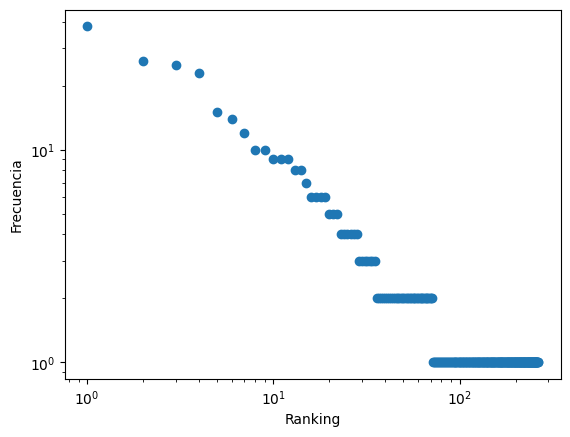

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(range(1,len(palabras_frec)+1),palabras_frec)
plt.xscale("log");plt.yscale("log")
plt.xlabel("Ranking"); plt.ylabel("Frecuencia");